In [1]:
import cv2
import numpy as np

BLUE = (255, 0, 0)

def showImage(img):
    from matplotlib import pyplot as plt
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [9]:
def drawLine(image, startPoint, endPoint, color):
  thickness = 5
  cv2.line(image,
        startPoint,
        endPoint,
        color,
        thickness)

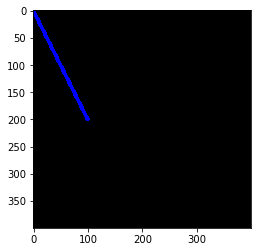

In [10]:
blackImage = np.zeros((400, 400, 3), dtype=np.uint8)

drawLine(blackImage, (0, 0), (100, 200), BLUE)

showImage(blackImage)